In [2]:
%matplotlib inline

# Task 1
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import  linear_model
import seaborn as sns


import math
np.set_printoptions(precision=3)
plt.rcParams.update({'font.size': 22})

2023-11-21 10:27:13.575038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
path_X = "../Project1_data/X.csv"
X = pd.read_csv(path_X)
path_Y = "../Project1_data/Y.csv"
Y = pd.read_csv(path_Y)

In [5]:

def NMAE(gt,pred,test_size):
    psum = 0
    gt = np.array(gt)
    for i in range(0,test_size):
        psum+= abs(gt[i] - pred[i])
    tmp = psum / test_size
    return tmp / np.mean(gt)

In [20]:
tmp = X.copy()
del tmp["TimeStamp"]

tmp["DispFrames"] = Y["DispFrames"]
sample_size = 1080
T = tmp.sample(sample_size,replace=False)
tmp = tmp.drop(T.index)
test_labels = T.iloc[:,-1:]
test_features = T.iloc[:,:-1]
train_labels = tmp.iloc[:,-1:]
train_features = tmp.iloc[:,:-1]
print(train_features.columns)

Index(['runq-sz', '%%memused', 'proc/s', 'cswch/s', 'all_%%usr', 'ldavg-1',
       'totsck', 'pgfree/s', 'plist-sz', 'file-nr', 'idel/s', 'tps'],
      dtype='object')


In [158]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(12, input_shape=(12,), activation='relu'))
model.add(Dense(12, input_shape=(12,), activation='relu'))
model.add(Dense(1))
 # Compile model
model.compile(loss='mean_squared_error', optimizer="adam")
history = model.fit(x=train_features, y= train_labels,validation_data=(test_features, test_labels),
    epochs=100)




Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 43701028.0000 - val_loss: 6460863.5000
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 2423100.2500 - val_loss: 561148.8750
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 184280.3125 - val_loss: 42884.3164
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 24271.8398 - val_loss: 17532.0703
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 14943.0479 - val_loss: 14708.3193
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 13082.6123 - val_loss: 13646.6680
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 12534.1230 - val_loss: 13101.1318
Epoch 8/100
79/79 [==============================] - 0s 4ms/step - loss: 12195.4404 - val_loss: 12749.3398
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 11720.5625 - val_loss: 12522.7803
Epoch 10/100
79/79 [========

79/79 [==============================] - 0s 3ms/step - loss: 97.1067 - val_loss: 87.9584
Epoch 80/100
79/79 [==============================] - 0s 3ms/step - loss: 98.8167 - val_loss: 93.8515
Epoch 81/100
79/79 [==============================] - 0s 3ms/step - loss: 95.9131 - val_loss: 74.8955
Epoch 82/100
79/79 [==============================] - 0s 4ms/step - loss: 96.0346 - val_loss: 83.6663
Epoch 83/100
79/79 [==============================] - 0s 3ms/step - loss: 100.3523 - val_loss: 83.8469
Epoch 84/100
79/79 [==============================] - 0s 3ms/step - loss: 103.8488 - val_loss: 86.1795
Epoch 85/100
79/79 [==============================] - 0s 3ms/step - loss: 95.2580 - val_loss: 108.3731
Epoch 86/100
79/79 [==============================] - 0s 3ms/step - loss: 90.4689 - val_loss: 92.4255
Epoch 87/100
79/79 [==============================] - 0s 3ms/step - loss: 90.8197 - val_loss: 140.6274
Epoch 88/100
79/79 [==============================] - 0s 3ms/step - loss: 95.1504 - val_los

In [159]:
pred = model.predict(test_features)
print(pred)
nmae = NMAE(test_labels,pred,len(test_labels))
print(nmae)

34/34 [==============================] - 0s 2ms/step
[[18.022]
 [38.693]
 [25.203]
 ...
 [16.855]
 [22.674]
 [22.923]]
[0.324]


In [54]:
def create_train_model(optimizer,regularizer,n_layers,n_nodes,train_features,train_labels,test_features,test_labels):
    model = Sequential()
    model.add(Dense(12, input_shape=(12,), kernel_initializer='normal', activation='relu'))

    for _ in range(n_layers):
        model.add(Dense(n_nodes, input_shape=(12,), kernel_initializer='normal',kernel_regularizer=regularizer, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',kernel_regularizer=regularizer))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x=train_features, y= train_labels,
    epochs=100,verbose=0)
    return model

In [105]:
n_layers = [0,1,2]
optimizers = [tf.keras.optimizers.legacy.Adadelta(),tf.keras.optimizers.legacy.RMSprop(),tf.keras.optimizers.legacy.Adam()]
#optimizers = [tf.keras.optimizers.AdamW()]
regularizer = [regularizers.L1(0.02),regularizers.L1(0.03),regularizers.L1(0.06),regularizers.L2(0.02),regularizers.L2(0.03),regularizers.L2(0.06)]
n_nodes = []
for alpha in range(5,10):
    n_nodes.append(math.floor(3060/(alpha*13)))
    
print(f"Combinations {len(n_layers*len(optimizers)*len(regularizer)*len(n_nodes))}")


Combinations 270


In [107]:
models = {}
count = 0
for l in n_layers:
    for o in optimizers:
        for r in regularizer:
            for n in n_nodes:
                print("Training model n.",count)
                count+=1
                
                m = create_train_model(o,r,l,n,train_features,train_labels,test_features,test_labels)
                pred = m.predict(test_features,verbose=0)
                models[count] = {"nlayers":l,"optimizer":o,"regularizer":r,"nnodes":n,"model":m,"pred":pred,"nmae": NMAE(test_labels,pred,len(test_labels))}
                print(models[count])


Training model n. 0
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1a1557a90>, 'pred': array([[-23.923],
       [136.958],
       [ 99.889],
       ...,
       [-18.246],
       [-13.472],
       [ 62.18 ]], dtype=float32), 'nmae': array([2.222])}
Training model n. 1
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1a1661a90>, 'pred': array([[12.106],
       [56.105],
       [55.267],
       ...,
       [ 2.901],
       [-2.557],
       [29.779]], dtype=float32), 'nmae': array([1.051])}
Training model n. 2
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regu

{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L2 object at 0x18f2edb10>, 'nnodes': 26, 'model': <keras.src.engine.sequential.Sequential object at 0x1a3347a90>, 'pred': array([[19.796],
       [32.704],
       [22.769],
       ...,
       [22.052],
       [15.819],
       [19.1  ]], dtype=float32), 'nmae': array([0.368])}
Training model n. 20
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157850>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1a35798d0>, 'pred': array([[  88.121],
       [-217.045],
       [-148.058],
       ...,
       [  68.024],
       [  16.654],
       [-132.753]], dtype=float32), 'nmae': array([6.489])}
Training model n. 21
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <k

{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L1 object at 0x18a105290>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x1a4835010>, 'pred': array([[19.911],
       [28.184],
       [27.461],
       ...,
       [17.62 ],
       [23.744],
       [25.227]], dtype=float32), 'nmae': array([0.171])}
Training model n. 39
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L1 object at 0x18a105290>, 'nnodes': 26, 'model': <keras.src.engine.sequential.Sequential object at 0x1a54cfa90>, 'pred': array([[13.877],
       [24.67 ],
       [23.946],
       ...,
       [11.793],
       [19.878],
       [22.045]], dtype=float32), 'nmae': array([0.111])}
Training model n. 40
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regulariz

{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157310>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x1a7a704d0>, 'pred': array([[17.587],
       [26.907],
       [26.688],
       ...,
       [15.617],
       [23.   ],
       [24.423]], dtype=float32), 'nmae': array([0.121])}
Training model n. 58
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157310>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x1a7c5f810>, 'pred': array([[17.782],
       [26.551],
       [26.371],
       ...,
       [16.183],
       [22.732],
       [24.18 ]], dtype=float32), 'nmae': array([0.122])}
Training model n. 59
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regulariz

{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0x18f2edb10>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x1a3d81a50>, 'pred': array([[15.186],
       [23.356],
       [24.744],
       ...,
       [12.498],
       [21.288],
       [23.466]], dtype=float32), 'nmae': array([0.102])}
Training model n. 78
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0x18f2edb10>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x1a447e610>, 'pred': array([[15.852],
       [23.265],
       [23.796],
       ...,
       [13.471],
       [21.531],
       [22.631]], dtype=float32), 'nmae': array([0.104])}
Training model n. 79
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0

{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x18a105290>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x188451b90>, 'pred': array([[16.185],
       [28.54 ],
       [17.267],
       ...,
       [16.676],
       [11.106],
       [21.834]], dtype=float32), 'nmae': array([0.29])}
Training model n. 98
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x18a105290>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x18a359a90>, 'pred': array([[16.835],
       [28.844],
       [18.751],
       ...,
       [17.626],
       [12.665],
       [20.625]], dtype=float32), 'nmae': array([0.302])}
Training model n. 99
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regu

{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157310>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1adb0c190>, 'pred': array([[17.791],
       [26.61 ],
       [17.448],
       ...,
       [19.225],
       [14.488],
       [19.298]], dtype=float32), 'nmae': array([0.335])}
Training model n. 117
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157310>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x1adb6dd10>, 'pred': array([[13.263],
       [28.042],
       [17.542],
       ...,
       [12.114],
       [11.416],
       [22.768]], dtype=float32), 'nmae': array([0.261])}
Training model n. 118
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.r

{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x18f2edb10>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1b013f810>, 'pred': array([[14.029],
       [24.199],
       [23.25 ],
       ...,
       [13.813],
       [22.652],
       [22.8  ]], dtype=float32), 'nmae': array([0.093])}
Training model n. 136
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x18f2edb10>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1b03a4190>, 'pred': array([[12.814],
       [22.711],
       [22.672],
       ...,
       [12.689],
       [22.871],
       [22.055]], dtype=float32), 'nmae': array([0.116])}
Training model n. 137
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regular

{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 26, 'model': <keras.src.engine.sequential.Sequential object at 0x1b28f04d0>, 'pred': array([[14.383],
       [22.927],
       [22.866],
       ...,
       [14.046],
       [22.523],
       [22.626]], dtype=float32), 'nmae': array([0.104])}
Training model n. 155
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 0x18a105290>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1b2a0f810>, 'pred': array([[14.331],
       [22.64 ],
       [23.264],
       ...,
       [13.952],
       [23.336],
       [22.408]], dtype=float32), 'nmae': array([0.099])}
Training model n. 156
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at

{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157850>, 'nnodes': 26, 'model': <keras.src.engine.sequential.Sequential object at 0x1b4cb7a90>, 'pred': array([[14.554],
       [24.631],
       [24.727],
       ...,
       [14.321],
       [21.658],
       [23.139]], dtype=float32), 'nmae': array([0.09])}
Training model n. 175
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157310>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1b4c3bbd0>, 'pred': array([[15.091],
       [23.383],
       [23.026],
       ...,
       [14.313],
       [23.602],
       [23.09 ]], dtype=float32), 'nmae': array([0.09])}
Training model n. 176
{'nlayers': 1, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L2 object at 0

{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x1856593d0>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x1b6f908d0>, 'pred': array([[15.703],
       [29.568],
       [19.206],
       ...,
       [16.167],
       [11.565],
       [19.607]], dtype=float32), 'nmae': array([0.301])}
Training model n. 194
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x1856593d0>, 'nnodes': 26, 'model': <keras.src.engine.sequential.Sequential object at 0x1b6a20dd0>, 'pred': array([[16.415],
       [25.165],
       [13.794],
       ...,
       [17.983],
       [12.336],
       [17.453]], dtype=float32), 'nmae': array([0.365])}
Training model n. 195
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.r

{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x1b6f818d0>, 'pred': array([[15.096],
       [22.839],
       [22.806],
       ...,
       [15.206],
       [20.81 ],
       [22.529]], dtype=float32), 'nmae': array([0.109])}
Training model n. 213
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 29, 'model': <keras.src.engine.sequential.Sequential object at 0x1b6784190>, 'pred': array([[15.825],
       [26.481],
       [25.397],
       ...,
       [15.556],
       [27.186],
       [24.91 ]], dtype=float32), 'nmae': array([0.105])}
Training model n. 214
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regular

{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157850>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1ba2ec4d0>, 'pred': array([[12.055],
       [19.327],
       [20.956],
       ...,
       [11.68 ],
       [18.943],
       [20.745]], dtype=float32), 'nmae': array([0.187])}
Training model n. 232
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regularizers.L2 object at 0x196157850>, 'nnodes': 33, 'model': <keras.src.engine.sequential.Sequential object at 0x1bbcac190>, 'pred': array([[13.909],
       [22.658],
       [22.268],
       ...,
       [13.874],
       [24.601],
       [21.948]], dtype=float32), 'nmae': array([0.103])}
Training model n. 233
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x18f723610>, 'regularizer': <keras.src.regular

{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 0x1856593d0>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1bdddc190>, 'pred': array([[15.416],
       [24.378],
       [24.187],
       ...,
       [14.381],
       [24.979],
       [23.927]], dtype=float32), 'nmae': array([0.08])}
Training model n. 251
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 0x1856593d0>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1bddc0550>, 'pred': array([[15.717],
       [25.356],
       [24.612],
       ...,
       [14.781],
       [25.796],
       [24.285]], dtype=float32), 'nmae': array([0.086])}
Training model n. 252
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 

In [111]:
min_nmae = 10000
min_model = 0
for m in models:
    
    if models[m]["nmae"][0] < min_nmae:
        min_nmae = models[m]["nmae"][0]
        min_model = m
        print(models[m])
    
        

{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1a1557a90>, 'pred': array([[-23.923],
       [136.958],
       [ 99.889],
       ...,
       [-18.246],
       [-13.472],
       [ 62.18 ]], dtype=float32), 'nmae': array([2.222])}
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>, 'nnodes': 39, 'model': <keras.src.engine.sequential.Sequential object at 0x1a1661a90>, 'pred': array([[12.106],
       [56.105],
       [55.267],
       ...,
       [ 2.901],
       [-2.557],
       [29.779]], dtype=float32), 'nmae': array([1.051])}
{'nlayers': 0, 'optimizer': <keras.src.optimizers.legacy.adadelta.Adadelta object at 0x1927e2750>, 'regularizer': <keras.src.regularizers.L1 object at 0x19c2d5b50>,

In [153]:
print(min_nmae)
print(models[min_model])
for e in regularizer:
    print(e)
print(tmp)

0.08039549913293013
{'nlayers': 2, 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x15199e690>, 'regularizer': <keras.src.regularizers.L1 object at 0x1856593d0>, 'nnodes': 47, 'model': <keras.src.engine.sequential.Sequential object at 0x1bdddc190>, 'pred': array([[15.416],
       [24.378],
       [24.187],
       ...,
       [14.381],
       [24.979],
       [23.927]], dtype=float32), 'nmae': array([0.08])}
      runq-sz  %%memused  proc/s  cswch/s  all_%%usr  ldavg-1  totsck  \
0          91      17.30     0.0  75865.0      97.96   122.77     557   
2          89      17.32     0.0  78790.0      98.00   122.77     556   
3          88      17.33     0.0  75077.0      97.75   122.77     555   
4          96      17.32    10.0  72717.0      97.79   122.77     553   
6          84      17.24     3.0  70805.0      98.37   119.18     545   
...       ...        ...     ...      ...        ...      ...     ...   
3594       10      35.35     0.0  10689.0      26.07     8.81  

In [141]:

T2 = T.copy()
T2["pred"] = models[min_model]["pred"]

T2 = T2.sort_index()
print(T2[T2["DispFrames"] ==0])
print(T2)

      runq-sz  %%memused  proc/s  cswch/s  all_%%usr  ldavg-1  totsck  \
1347      104      25.39     2.0  72743.0      97.96    71.85     652   

      pgfree/s  plist-sz  file-nr  idel/s  tps  DispFrames       pred  
1347  103785.0      1146     2688    71.0  0.0         0.0  15.511813  
      runq-sz  %%memused  proc/s  cswch/s  all_%%usr  ldavg-1  totsck  \
1          86      17.31     0.0  74651.0      98.29   122.77     556   
5          78      17.32    18.0  67272.0      97.96   119.18     552   
7          77      17.25     0.0  70066.0      98.25   119.18     544   
10         80      17.28    19.0  69603.0      97.71   117.01     531   
20         87      17.23    18.0  71000.0      98.00   111.19     513   
...       ...        ...     ...      ...        ...      ...     ...   
3585       10      35.33     0.0  12322.0      28.60    10.23     281   
3587       10      35.33     0.0  11421.0      28.76    10.23     281   
3590        9      35.34    21.0  10812.0      27.40

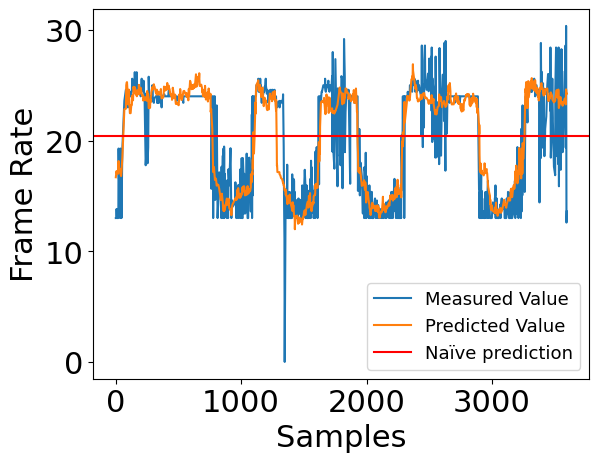

In [150]:
plt.plot(T2["DispFrames"],label="Measured Value")
plt.plot(T2["pred"], label="Predicted Value")
plt.axhline(y=np.mean(test_labels), color='r', linestyle='-', label="Naïve prediction")
plt.xlabel("Samples")
plt.ylabel("Frame Rate")
plt.legend(fontsize="13")
plt.savefig("Predictions.pdf",bbox_inches="tight")

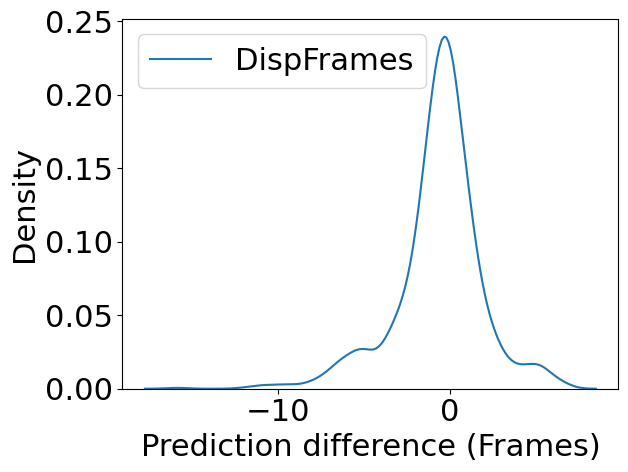

In [149]:
sns.kdeplot(test_labels - pred)

plt.xlabel("Prediction difference (Frames)")
plt.savefig("Density_predictions.pdf",bbox_inches='tight')
plt.savefig("Difference.pdf",bbox_inches="tight")